In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

## Data Setting

In [2]:
pre = pd.read_csv('kd_data.csv')

pre_df = pd.DataFrame(pre)

pre_df

,person_id,gender,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,...,Malignant neoplastic disease,Chronic liver disease,chronic obstructive lung disease,cerebrovascular disease,chronic kidney disease,Diabetes mellitus,Ischemic heart disease,hyperlipidemia,Hypertensive disorder,cancer
0,1673221,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1289235,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1690134,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,530465,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,737827,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1756845,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405,14298,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406,1646575,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407,352251,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
pre_df.columns = ['person_id','gender', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5',
       'age_6', 'age_7', 'age_8', 'smoking_status_0.0', 'smoking_status_1.0',
       'smoking_status_2.0', 'smoking_status_3.0', 'bmi_1.0', 'bmi_2.0', 'bmi_3.0',
       'bmi_4.0', 'Malignant_neoplastic_disease', 'Chronic_liver_disease',
       'chronic_obstructive_lung_disease', 'cerebrovascular_disease',
       'chronic_kidney_disease', 'Diabetes_mellitus', 'Ischemic_heart_disease',
       'hyperlipidemia', 'Hypertensive_disorder', 'cancer']

pre_df = pre_df.astype('int64')

In [9]:
em_data = pd.read_csv('Ensemble_data.csv')

In [27]:
# Data used for SHAP

result = pd.read_csv('result.csv')

In [6]:
x_train, x_test, y_train, y_test = train_test_split(pre_df.iloc[:,1:27],pre_df['cancer'], test_size=0.3, stratify=pre_df['cancer'],random_state=3)

In [7]:
Y_cate = to_categorical(pre_df['cancer'])
X_data = pre_df.iloc[:,1:27]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_cate, test_size=0.3, random_state=3)

In [10]:
em_train, em_test = train_test_split(em_data, test_size=0.3, random_state=3)

In [11]:
em_test = em_test.reset_index(drop=True)

In [28]:
result

,ID,Proba,Pred,SVM,RF,DL,index,cancer
0,638029,[0.02739375],0,0,0,0,268,0
1,714985,[0.2496541],0,1,0,0,128,0
2,197473,[0.2496541],0,1,0,0,230,0
3,321621,[0.02739375],0,0,0,0,101,0
4,1751945,[0.02739375],0,0,0,0,236,0
...,...,...,...,...,...,...,...,...
118,213450,[0.2496541],0,1,0,0,80,1
119,517322,[0.2496541],0,1,0,0,284,0
120,763742,[0.02739375],0,0,0,0,388,0
121,304185,[0.02739375],0,0,0,0,265,0


## SHAP

In [13]:
! git clone https://github.com/shap/shap.git

Cloning into 'shap'...
remote: Enumerating objects: 15376, done.
remote: Counting objects: 100% (3667/3667), done.
remote: Compressing objects: 100% (643/643), done.
remote: Total 15376 (delta 3311), reused 3088 (delta 3024), pack-reused 11709
Receiving objects: 100% (15376/15376), 282.11 MiB | 17.13 MiB/s, done.
Resolving deltas: 100% (10725/10725), done.
Updating files: 100% (488/488), done.


In [14]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.2 MB/s eta 0:00:00


In [15]:
import shap
shap.initjs()
import matplotlib.pyplot as plt
import joblib

### Ensemble

In [17]:
ensemble = joblib.load('Ensemble.pkl')

In [18]:
em_explainer = shap.KernelExplainer(model = ensemble.predict, data=em_train, link="logit")
em_shap_values = em_explainer.shap_values(em_test)

9/9 [==============================] - 0s 3ms/step


  0%|          | 0/123 [00:00<?, ?it/s]

54/54 [==============================] - 0s 2ms/step


In [19]:
em_shap_values[0][61] # Value of the 62th patient

array([0.91800784, 0.92338098, 0.13439126])

In [20]:
em_test.loc[61,:]

SVM    1
RF     1
DL     1
Name: 61, dtype: int64

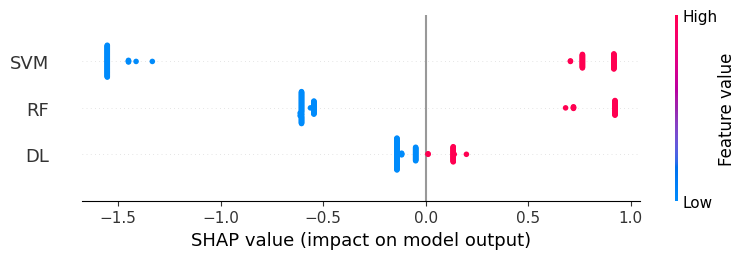

In [21]:
plt.figure()
shap.summary_plot(em_shap_values[0], em_test)
plt.draw()
plt1 = plt.gcf()
plt.close()

In [22]:
# Verify the SHAP result plot with the patient's ID
def make_plot(ids):
    index = result.index[result['ID'] == ids]
    plt.figure()
    shap.force_plot(em_explainer.expected_value, em_shap_values[0][index], em_test.loc[index,:],matplotlib=True)
    plt.close()

<Figure size 640x480 with 0 Axes>

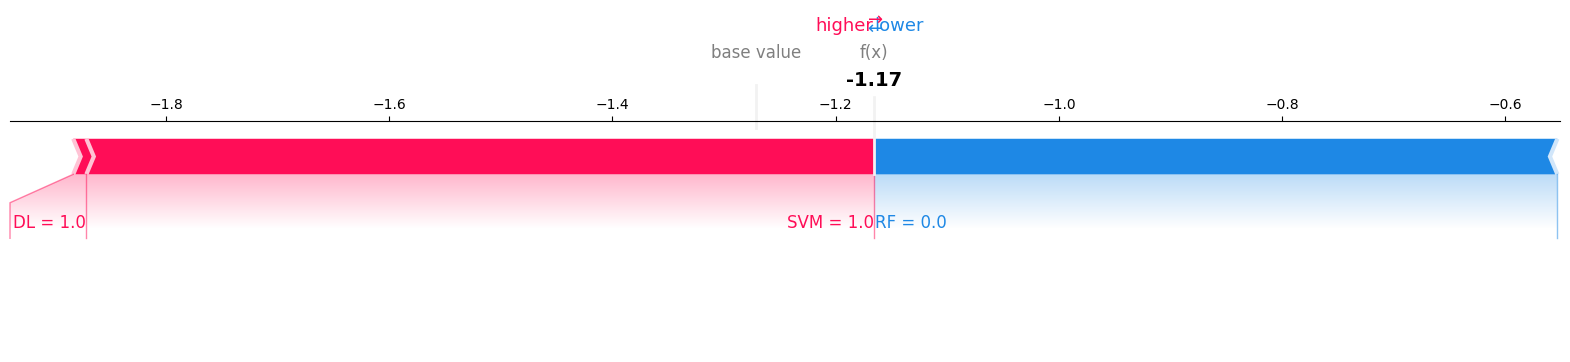

In [23]:
# ID 209879 : gastritis patient

make_plot(209879)

<Figure size 640x480 with 0 Axes>

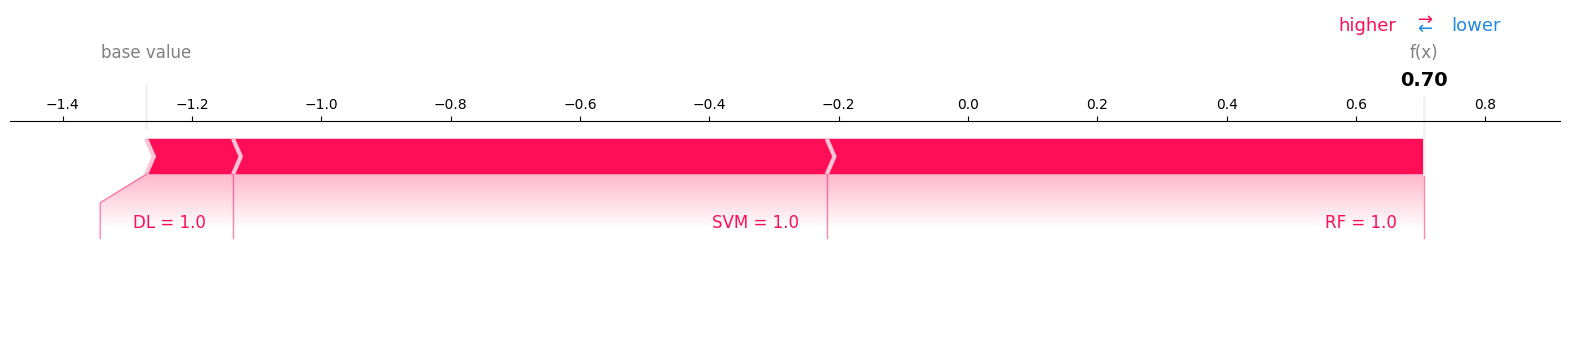

In [29]:
# ID 278403 : gastric cancer patient

make_plot(278403)

In [31]:
shap.initjs()
shap.force_plot(em_explainer.expected_value[0], em_shap_values[0], em_test, link="logit")

### SVM

In [33]:
svm = joblib.load('SVM.pkl')
svm = svm.fit(x_train,y_train)

svm_explainer = shap.KernelExplainer(model = svm.predict, data=X_train)
svm_shap_values = svm_explainer.shap_values(X_test)

  0%|          | 0/123 [00:00<?, ?it/s]

In [34]:
svm_shap_values[0]

array([-0.4281312 ,  0.00656796,  0.03467114,  0.01840729,  0.01275239,
       -0.2518039 ,  0.00989371, -0.02743925,  0.00511154,  0.05628848,
        0.01215718,  0.        ,  0.0276283 ,  0.00366508,  0.        ,
        0.0378812 , -0.06889229,  0.        ,  0.00679252,  0.00966824,
        0.01594639,  0.00088911,  0.00888265,  0.00558418,  0.00087402,
        0.05854932])

In [35]:
def make_svm_plot(ids):
    index = result.index[result['ID'] == ids]
    plt.figure()
    shap.force_plot(svm_explainer.expected_value, svm_shap_values[index], X_test.iloc[index,:],matplotlib=True, text_rotation=17)
    plt.draw()
    plt1 = plt.gcf()
    plt.close()

<Figure size 640x480 with 0 Axes>

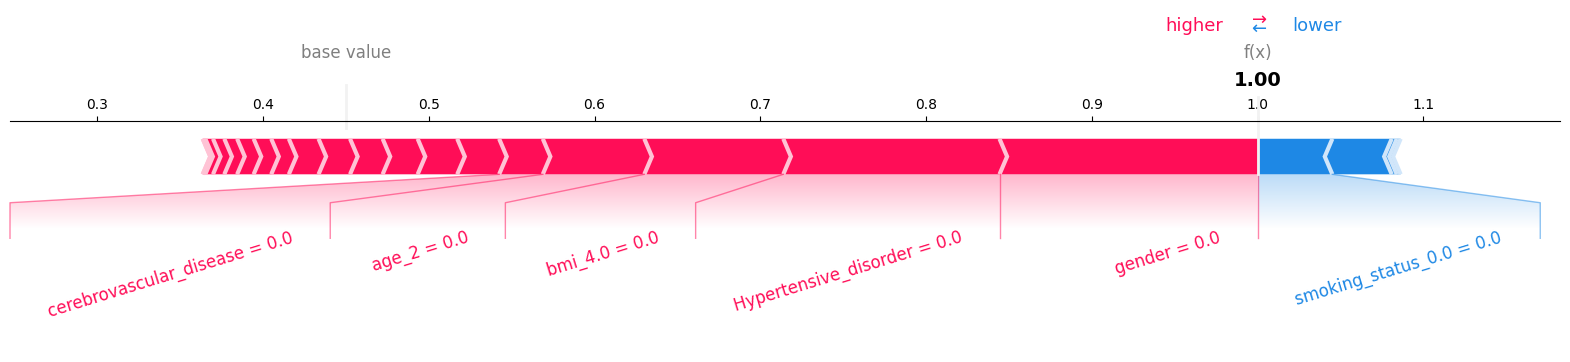

In [ ]:
make_svm_plot(278403)

### Random Forest

In [37]:
rf = joblib.load('Random Forest.pkl')
rf = rf.fit(x_train,y_train)

rf_explainer = shap.KernelExplainer(model = rf.predict, data=X_train)
rf_shap_values = rf_explainer.shap_values(X_test)

  0%|          | 0/123 [00:00<?, ?it/s]

In [38]:
rf_shap_values[0]

array([-0.08968869,  0.00255957,  0.01358262,  0.01070431,  0.00816897,
       -0.01286013, -0.00479701, -0.07893031, -0.02222191,  0.00716249,
        0.00445339,  0.        , -0.00370387, -0.00629193, -0.08340678,
        0.04773366, -0.08058256,  0.        ,  0.00095205, -0.00231588,
        0.00344768, -0.00445563,  0.003556  , -0.00180909,  0.        ,
        0.02300878])

In [39]:
def make_rf_plot(ids):
    index = result.index[result['ID'] == ids]
    plt.figure()
    shap.force_plot(rf_explainer.expected_value, rf_shap_values[index], X_test.iloc[index,:],matplotlib=True, text_rotation=17)
    plt.draw()
    plt1 = plt.gcf()
    plt.close()

<Figure size 640x480 with 0 Axes>

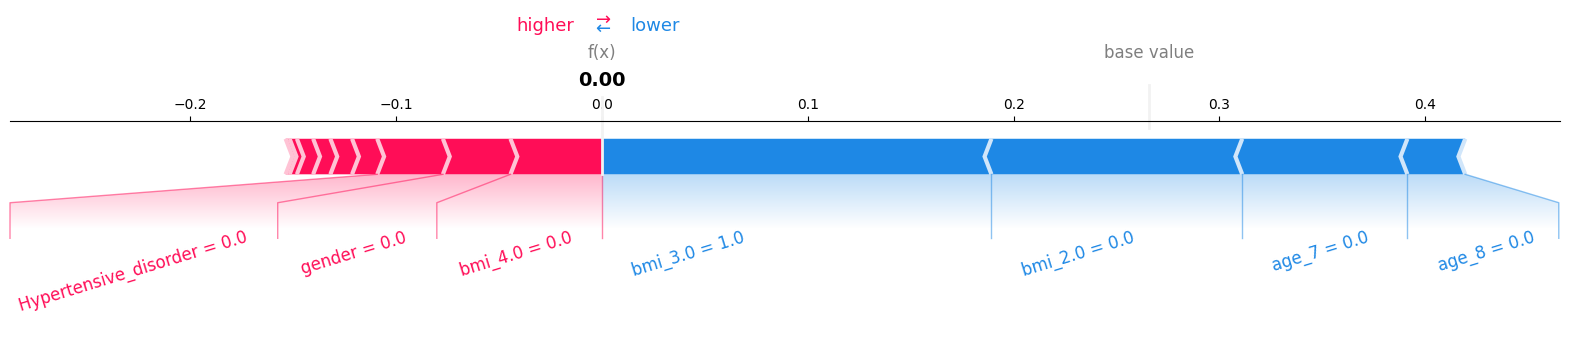

In [41]:
# ID 209879 : gastritis patient

make_rf_plot(209879)

<Figure size 640x480 with 0 Axes>

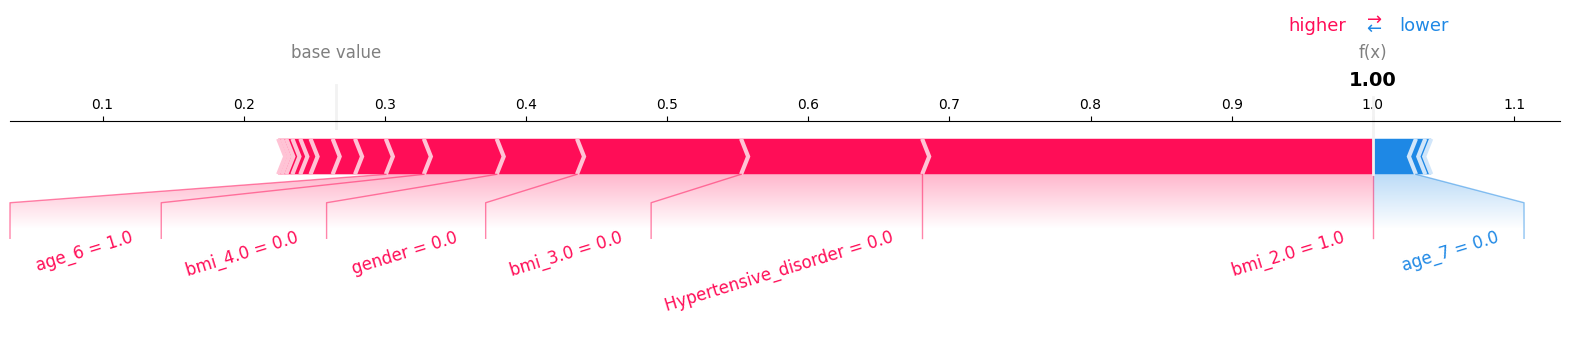

In [40]:
# ID 278403 : gastric cancer patient

make_rf_plot(278403)